<a href="https://colab.research.google.com/github/EmanoneL/data_analysis_pet_project/blob/main/class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest # Критерий Колмогорова-Смирнова

In [ ]:
!pip install ucimlrepo
!pip install catboost

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)


{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

In [ ]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
X['season'].value_counts()

,count
season,
a,30177
u,22898
w,5267
s,2727


Этот набор данных представляет собой очищенную версию исходного набора данных грибов для двоичной классификации, доступного в библиотеке UCI. Он содержит 9 столбцов:

Диаметр крышки
Форма крышки
Жаберное прикрепление
Цвет жабр
Высота штока
Ширина штока
Цвет стебля
Сезон
Целевой класс: съедобно или нет?
Целевой класс содержит два значения — 0 или 1, где 0 относится к съедобному, а 1 — к ядовитому.

In [ ]:
# Проверяет близость к нормальному распределению для фичи по критерию Колмогорова-Смирнова
def checkStandart(df, feature_name):
  data = (df[feature_name] - df[feature_name].mean()) / df[feature_name].std()

  # Выполняем K-S тест для проверки нормальности
  stat, p_value = kstest(data, 'norm')
  print(f'Statistic: {stat}, p-value: {p_value}')

  # Интерпретация результата
  alpha = 0.05
  if p_value > alpha:
      print('Распределение близко к нормальному (не отклоняем H0)')
  else:
      print('Распределение отличается от нормального (отклоняем H0)')

### Дискриптивный анализ


In [ ]:
#Загрузка данных
all_data = pd.read_csv('/content/mushroom_cleaned.csv')
all_data.head(20)


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'cap-shape'}>,
        <Axes: title={'center': 'gill-attachment'}>],
       [<Axes: title={'center': 'gill-color'}>,
        <Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>],
       [<Axes: title={'center': 'stem-color'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

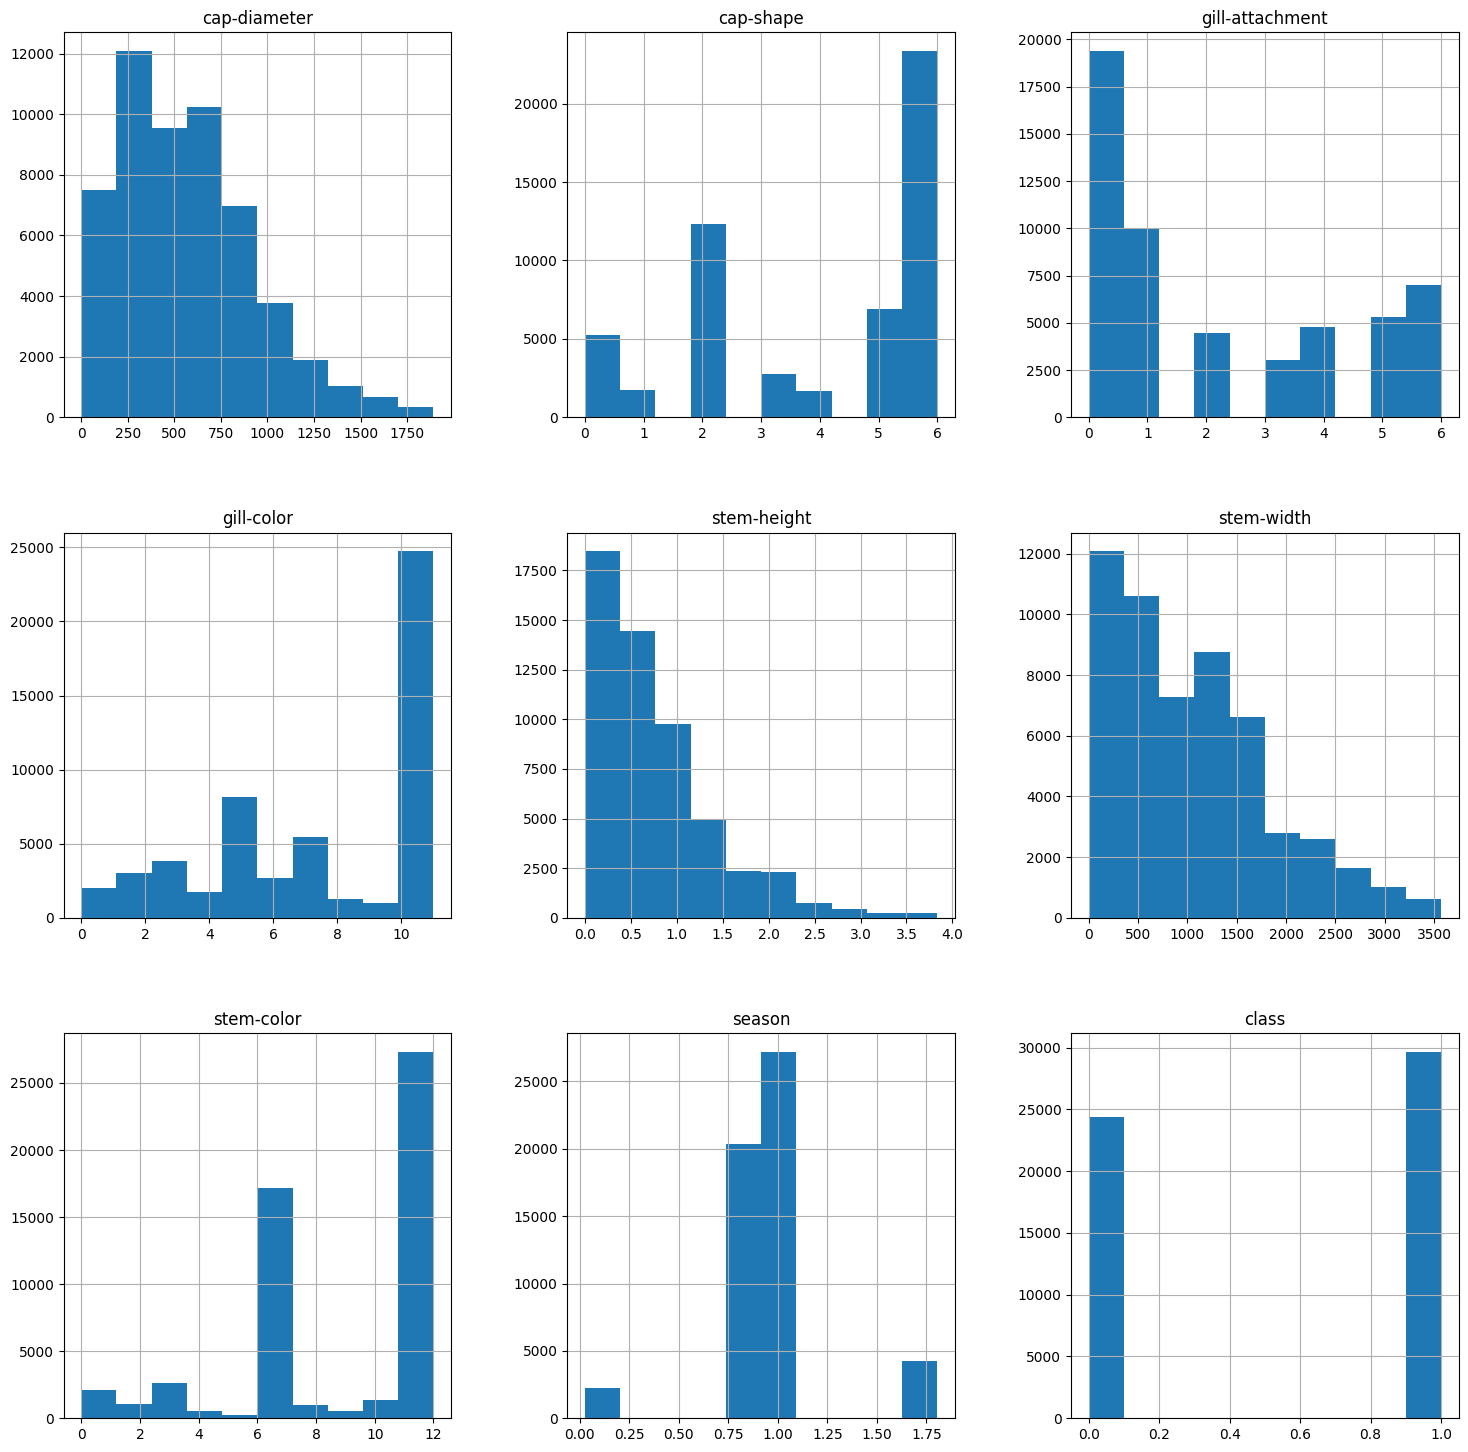

In [ ]:
all_data.hist(figsize=(18,18))

In [ ]:
all_data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
checkStandart(all_data, 'cap-diameter')

Statistic: 0.06603000105799428, p-value: 2.8359588090784317e-205
Распределение отличается от нормального (отклоняем H0)


In [ ]:
checkStandart(all_data, 'stem-width')

Statistic: 0.08947462078555507, p-value: 0.0
Распределение отличается от нормального (отклоняем H0)


In [ ]:
checkStandart(all_data, 'stem-height')

Statistic: 0.12191448540488353, p-value: 0.0
Распределение отличается от нормального (отклоняем H0)


In [ ]:
all_data['cap-shape'].value_counts()

,count
cap-shape,
6,23377
2,12294
5,6889
0,5273
3,2780
1,1722
4,1700


In [ ]:
all_data['gill-attachment'].value_counts()

,count
gill-attachment,
0,19405
1,10026
6,7001
5,5292
4,4795
2,4474
3,3042


In [ ]:
all_data['gill-color'].value_counts()

,count
gill-color,
10,16531
11,8214
5,8154
7,5455
3,3847
2,3042
6,2714
4,1772
8,1271


In [ ]:
all_data['stem-color'].value_counts()

,count
stem-color,
11,20317
6,15316
12,7017
3,2626
1,1918
7,1848
10,1393
2,1059
8,1025


In [ ]:
all_data['season'].value_counts()

,count
season,
0.943195,27210
0.888450,20387
1.804273,4219
0.027372,2219


In [ ]:
all_data['class'].value_counts()

,count
class,
1,29675
0,24360


### Подготовка к построению модели

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Разделите на признаки и целевую переменную
X = all_data.drop(columns=["class"])
y = all_data["class"]

In [ ]:
cat_features = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']
# for cat in cat_features:
#   X[cat] = X[cat].astype(str)

In [ ]:
for cat in cat_features:
  X = pd.get_dummies(X, cat,dtype=int)

делим на обучающую и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#y_test.value_counts()

In [ ]:
# y_train.value_counts()

In [ ]:
# X_train.info()

###Наивный байесовский метод



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Обучаем модель
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Предсказываем значения для обучающей выборки
y_pred_train = nb_model.predict(X_train)

# Вычисляем метрики для обучающей выборки
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='binary')  # Указываем 'binary', если целевая переменная бинарная
precision_train = precision_score(y_train, y_pred_train, average='binary')
recall_train = recall_score(y_train, y_pred_train, average='binary')

# Выводим результаты
print(f"Наивный Байес: результаты для обучающей выборки")
print(f"Accuracy: {accuracy_train}")
print(f"F1 Score: {f1_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")

# Вычисляем метрики для тестовой выборки
accuracy_test = accuracy_score(y_test, y_pred_nb)
f1_test = f1_score(y_test, y_pred_nb, average='binary')
precision_test = precision_score(y_test, y_pred_nb, average='binary')
recall_test = recall_score(y_test, y_pred_nb, average='binary')

# Выводим результаты
print(f"\nНаивный Байес: результаты для тестовой выборки")
print(f"Accuracy: {accuracy_test}")
print(f"F1 Score: {f1_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")


Наивный Байес: результаты для обучающей выборки
Accuracy: 0.6362311464791339
F1 Score: 0.6835188278624187
Precision: 0.6544494546575712
Recall: 0.715290648694187

Наивный Байес: результаты для тестовой выборки
Accuracy: 0.6399555843434811
F1 Score: 0.6863361547762998
Precision: 0.6579598145285935
Recall: 0.7172704296545914


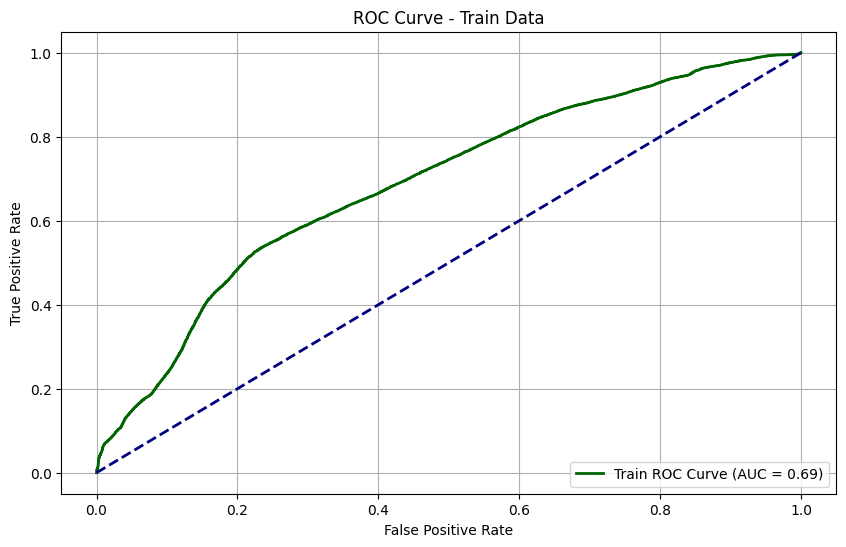

In [ ]:
from sklearn.metrics import precision_recall_curve
y_pred_proba_train = nb_model.predict_proba(X_train)[:, 1]
# Построение ROC-кривой
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Построение Precision-Recall кривой
precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_proba_train)
pr_auc_train = auc(recall_train, precision_train)

# Визуализация ROC-кривой для обучающей выборки
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='darkgreen', lw=2, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Data')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = nb_model.predict_proba(X_train)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_train, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.6884754885126638
PR-AUC: 0.7158413262209079


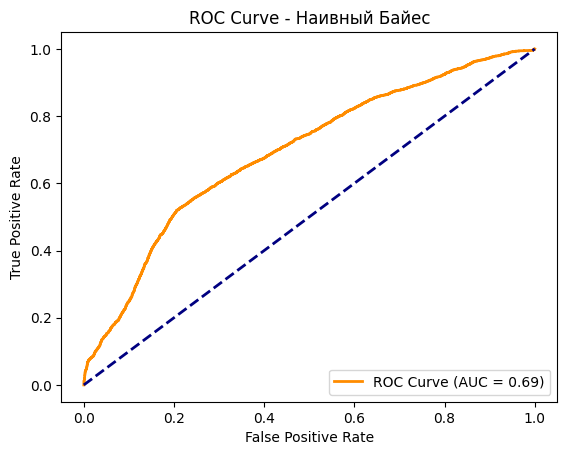

In [ ]:
from sklearn.metrics import precision_recall_curve

# Предсказание вероятностей для тестовой выборки
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]  # Вероятность для класса 1

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_nb)
roc_auc = auc(fpr, tpr)

# Визуализация
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Наивный Байес')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.6926812153557352
PR-AUC: 0.7232871701929038


Другие методы

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Функция для обучения и оценки модели
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Метрики для обучающей выборки
    print(f"{model_name}: результаты для обучающей выборки")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"F1 Score: {f1_score(y_train, y_pred_train, average='binary'):.4f}")
    print(f"Precision: {precision_score(y_train, y_pred_train, average='binary'):.4f}")
    print(f"Recall: {recall_score(y_train, y_pred_train, average='binary'):.4f}")

    # Метрики для тестовой выборки
    print(f"\n{model_name}: результаты для тестовой выборки")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred_test, average='binary'):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_test, average='binary'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_test, average='binary'):.4f}\n")

    return y_pred_proba

# Обучение и оценка разных моделей
print("\nGaussianNB:")
y_pred_proba_gnb = evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test, "GaussianNB")

print("\nMultinomialNB:")
y_pred_proba_mnb = evaluate_model(MultinomialNB(), X_train, X_test, y_train, y_test, "MultinomialNB")

print("\nComplementNB:")
y_pred_proba_cnb = evaluate_model(ComplementNB(), X_train, X_test, y_train, y_test, "ComplementNB")

print("\nBernoulliNB:")
y_pred_proba_bnb = evaluate_model(BernoulliNB(), X_train, X_test, y_train, y_test, "BernoulliNB")



GaussianNB:
GaussianNB: результаты для обучающей выборки
Accuracy: 0.6362
F1 Score: 0.6835
Precision: 0.6544
Recall: 0.7153

GaussianNB: результаты для тестовой выборки
Accuracy: 0.6400
F1 Score: 0.6863
Precision: 0.6580
Recall: 0.7173


MultinomialNB:
MultinomialNB: результаты для обучающей выборки
Accuracy: 0.5875
F1 Score: 0.6480
Precision: 0.6098
Recall: 0.6913

MultinomialNB: результаты для тестовой выборки
Accuracy: 0.5968
F1 Score: 0.6531
Precision: 0.6191
Recall: 0.6910


ComplementNB:
ComplementNB: результаты для обучающей выборки
Accuracy: 0.5874
F1 Score: 0.6447
Precision: 0.6116
Recall: 0.6816

ComplementNB: результаты для тестовой выборки
Accuracy: 0.5953
F1 Score: 0.6490
Precision: 0.6196
Recall: 0.6812


BernoulliNB:
BernoulliNB: результаты для обучающей выборки
Accuracy: 0.5482
F1 Score: 0.5224
Precision: 0.6226
Recall: 0.4500

BernoulliNB: результаты для тестовой выборки
Accuracy: 0.5471
F1 Score: 0.5173
Precision: 0.6238
Recall: 0.4418



###Метод k-ближайших соседей (KNN)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_curve, auc, precision_recall_curve, roc_auc_score
)
import matplotlib.pyplot as plt

# Создаем модель KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель
knn_model.fit(X_train, y_train)

# Предсказываем на обучающей выборке
y_pred_train_knn = knn_model.predict(X_train)
y_pred_proba_train_knn = knn_model.predict_proba(X_train)[:, 1]

# Предсказываем на тестовой выборке
y_pred_test_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]  # Для ROC и PR-кривых


In [ ]:
# Метрики для обучающей выборки
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
f1_train_knn = f1_score(y_train, y_pred_train_knn, average='binary')
precision_train_knn = precision_score(y_train, y_pred_train_knn, average='binary')
recall_train_knn = recall_score(y_train, y_pred_train_knn, average='binary')

print(f"KNN: результаты для обучающей выборки")
print(f"Accuracy: {accuracy_train_knn}")
print(f"F1 Score: {f1_train_knn}")
print(f"Precision: {precision_train_knn}")
print(f"Recall: {recall_train_knn}")


# Метрики для тестовой выборки
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
f1_test_knn = f1_score(y_test, y_pred_test_knn, average='binary')
precision_test_knn = precision_score(y_test, y_pred_test_knn, average='binary')
recall_test_knn = recall_score(y_test, y_pred_test_knn, average='binary')

print(f"\nKNN: результаты для тестовой выборки")
print(f"Accuracy: {accuracy_test_knn}")
print(f"F1 Score: {f1_test_knn}")
print(f"Precision: {precision_test_knn}")
print(f"Recall: {recall_test_knn}")


KNN: результаты для обучающей выборки
Accuracy: 0.8199083927084297
F1 Score: 0.8351997290374479
Precision: 0.8394825311715393
Recall: 0.8309604043807919

KNN: результаты для тестовой выборки
Accuracy: 0.711298232627001
F1 Score: 0.736619956103326
Precision: 0.738115378108611
Recall: 0.7351305812973884


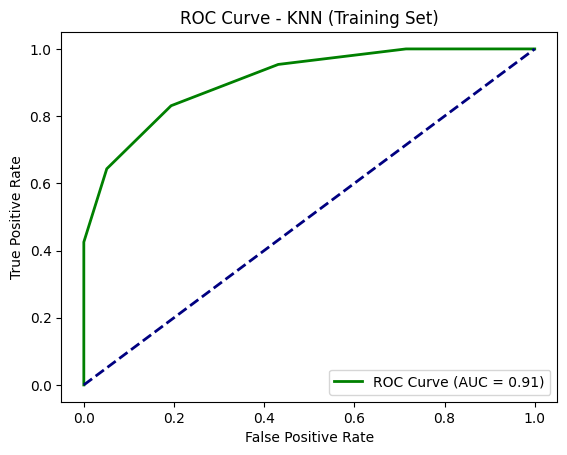

ROC-AUC (KNN - Training): 0.9066847111669524
PR-AUC (KNN - Training): 0.9312913750737246


In [ ]:
# from sklearn.metrics import roc_curve, auc, precision_recall_curve

# # Вычисление ROC-AUC и PR-AUC для обучающей выборки
# fpr_train_knn, tpr_train_knn, _ = roc_curve(y_train, y_pred_proba_train_knn)
# roc_auc_train_knn = auc(fpr_train_knn, tpr_train_knn)

# precision_train_knn, recall_train_knn, _ = precision_recall_curve(y_train, y_pred_proba_train_knn)
# pr_auc_train_knn = auc(recall_train_knn, precision_train_knn)

# # Построение Precision-Recall кривой для обучающей выборки
# plt.figure(figsize=(10, 6))
# plt.plot(recall_train_knn, precision_train_knn, color='purple', lw=2, label=f'Train PR Curve (AUC = {pr_auc_train_knn:.2f})')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve - Train Data (KNN)')
# plt.legend(loc="lower left")
# plt.grid()
# plt.show()

# # Вывод ROC-AUC и PR-AUC для обучающей выборки
# print(f"KNN: обучающая выборка")
# print(f"ROC-AUC (Train): {roc_auc_train_knn:.4f}")
# print(f"PR-AUC (Train): {pr_auc_train_knn:.4f}")


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Расчёт ROC-кривой и AUC для обучающей выборки
fpr_knn_train, tpr_knn_train, _ = roc_curve(y_train, y_pred_proba_train_knn)
roc_auc_knn_train = auc(fpr_knn_train, tpr_knn_train)

# Визуализация ROC-кривой для обучающей выборки
plt.figure()
plt.plot(fpr_knn_train, tpr_knn_train, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Линия случайных угадываний
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (Training Set)')
plt.legend(loc="lower right")
plt.show()


precision_knn_train, recall_knn_train, _ = precision_recall_curve(y_train, y_pred_proba_train_knn)
pr_auc_knn_train = auc(recall_knn_train, precision_knn_train)

# Вывод ROC-AUC и PR-AUC для обучающей выборки
print(f"ROC-AUC (KNN - Training): {roc_auc_knn_train}")
print(f"PR-AUC (KNN - Training): {pr_auc_knn_train}")



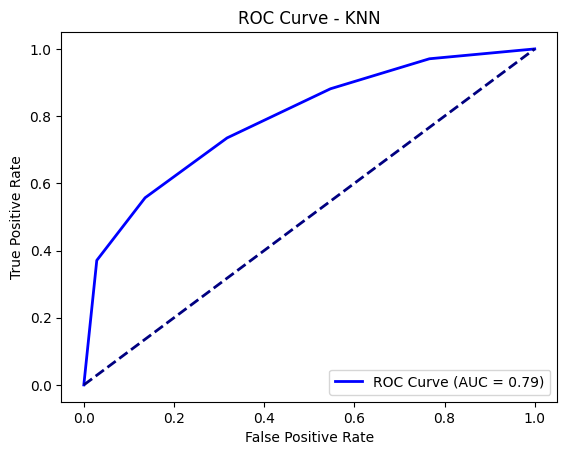

In [ ]:
# ROC-кривая
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

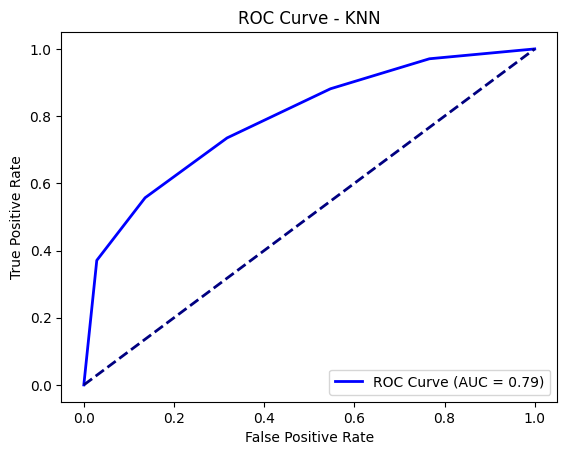

ROC-AUC (KNN): 0.7911698711963069
PR-AUC (KNN): 0.8407812857619845


In [ ]:
# ROC-кривая
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()


precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_proba_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

print(f"ROC-AUC (KNN): {roc_auc_knn}")
print(f"PR-AUC (KNN): {pr_auc_knn}")

# plt.figure()
# plt.plot(recall_knn, precision_knn, color='green', lw=2, label=f'PR Curve (AUC = {pr_auc_knn:.2f})')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve - KNN')
# plt.legend(loc="lower right")
# plt.show()


меняем параметры

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method_kmeans(X, max_k=20):

    inertia_values = []

    # Перебор числа кластеров от 1 до max_k
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    # Построение графика метода локтя
    plt.figure()
    plt.plot(range(1, max_k + 1), inertia_values, marker='o', color='blue', label="Inertia")
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.xticks(range(1, max_k + 1))
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    return inertia_values



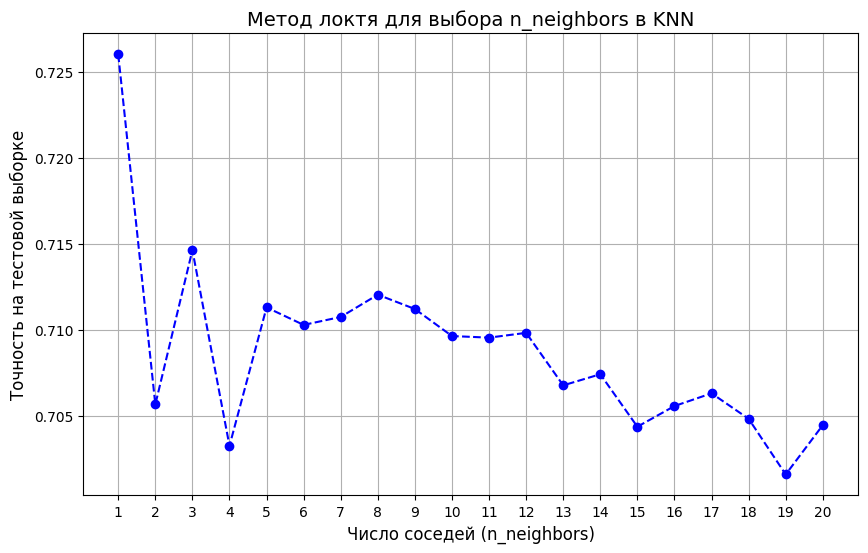

In [ ]:
# Диапазон значений для n_neighbors
n_neighbors_range = range(1, 21)

# Список для хранения точностей
accuracies = []

# Вычисление точности для каждого значения n_neighbors
for k in n_neighbors_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, accuracies, marker='o', linestyle='--', color='b')
plt.title("Метод локтя для выбора n_neighbors в KNN", fontsize=14)
plt.xlabel("Число соседей (n_neighbors)", fontsize=12)
plt.ylabel("Точность на тестовой выборке", fontsize=12)
plt.xticks(n_neighbors_range)
plt.grid()
plt.show()

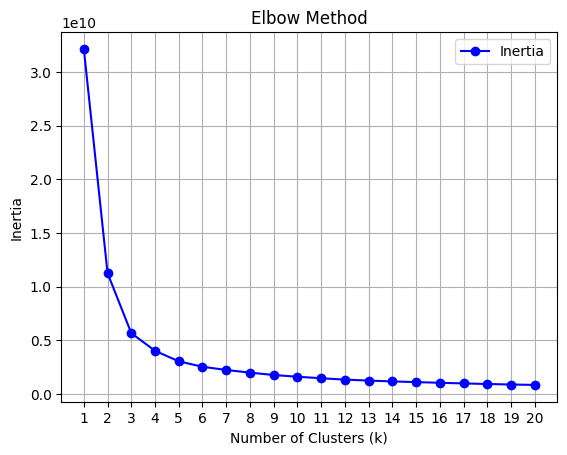

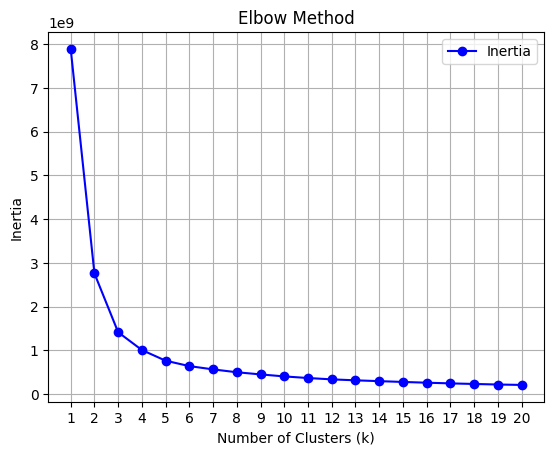


Метрики для обучающей выборки (n_neighbors = 1):
Accuracy: 0.6362
F1 Score: 0.6835
Precision: 0.6544
Recall: 0.7153

Метрики для тестовой выборки (n_neighbors = 1):
Accuracy: 0.6235
F1 Score: 0.6035
Precision: 0.7156
Recall: 0.5218


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt

# # Исследуем разные значения n_neighbors
# k_values = range(1, 21)  # Значения от 1 до 20
# accuracies = []

# for k in k_values:
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(X_train, y_train)
#     y_pred_test = knn_model.predict(X_test)
#     accuracies.append(accuracy_score(y_test, y_pred_test))

# # Построение графика "метод локтя"
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
# plt.title('Метод локтя для выбора оптимального n_neighbors')
# plt.xlabel('Число соседей (n_neighbors)')
# plt.ylabel('Точность на тестовой выборке')
# plt.grid()
# plt.show()

# # Выбор оптимального значения n_neighbors
# optimal_k = k_values[accuracies.index(max(accuracies))]
# print(f"Оптимальное значение n_neighbors: {optimal_k}")

# # Классификация с выбранным n_neighbors
# knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
# knn_optimal.fit(X_train, y_train)
# y_pred_train = knn_optimal.predict(X_train)
# y_pred_test = knn_optimal.predict(X_test)

# from sklearn.cluster import KMeans
# import numpy as np
# # # Выбор оптимального значения n_neighbors
# optimal_k = k_values[accuracies.index(max(accuracies))]
# print(f"Оптимальное значение n_neighbors: {optimal_k}")

# wcss = []
# for i in range(1, 21):
#   kmeans = KNeighborsClassifier(n_neighbors=i)
#   kmeans.fit(X_train, y_train)
#   wcss.append(kmeans.inertia_)

# plt.plot(range(1, 21), wcss)
# plt.title('Метод локтя(обучающая)')
# plt.xlabel('Количество кластеров')
# plt.ylabel('WCSS')
# plt.show()

# # Метод локтя для выбора числа кластеров
# wcss = []
# for i in range(1, 21):
#   kmeans = KNeighborsClassifier(n_neighbors=i)
#   kmeans.fit(X_test, y_test)
#   wcss.append(kmeans.inertia_)

# plt.plot(range(1, 21), wcss)
# plt.title('Метод локтя(тестовая)')
# plt.xlabel('Количество кластеров')
# plt.ylabel('WCSS')
# plt.show()
from sklearn.datasets import make_blobs
elbow_method_kmeans(X_train, max_k=20)
elbow_method_kmeans(X_test, max_k=20)
# Вычисление метрик для обучающей и тестовой выборок
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(f"\nМетрики для обучающей выборки:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"F1 Score: {f1_score(y_train, y_pred_train, average='binary'):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_train, average='binary'):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_train, average='binary'):.4f}")

print(f"\nМетрики для тестовой выборки:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_test, average='binary'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test, average='binary'):.4f}")


-------------------------------------------------------------------------------------------

Можно заметить, насколько CatBoost лучше справляется с исходной задачей, но они и не удивительно, так как его алгоритм более сложен и заключается в обучении на собственнх ошибках. Высокие результаты могут быть объяснены переобучением модели, но эта гипотеза потребует дополнительных исследований. В нашей задаче, ошибка в сторону безопасного гриба будет менее критичной, чем ошибка в сторону ядовитого гриба, который может быть съеден, поэтому метрика recall более важная

Поменяем параметры GaussianNB

1. priors:
Этот параметр определяет априорные вероятности классов. Если не указать, то предполагается равновероятное распределение.

2. var_smoothing:
Этот параметр используется для сглаживания (регуляризации) дисперсии признаков. Он добавляет маленькое значение к дисперсии, чтобы избежать деления на очень маленькие или нулевые значения. Это помогает избежать числовых проблем, особенно в случае, когда признаки имеют очень маленькую дисперсию.


In [ ]:
model = GaussianNB(priors=[0.55, 0.45], var_smoothing=1e-6)

# Обучаем модель
model.fit(X_train, y_train)


GaussianNB(priors=[0.55, 0.45], var_smoothing=1e-06)

In [ ]:
# Делаем предсказания
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Вычисляем метрики для обучающей выборки
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)

# Выводим результаты
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.625936892754696
F1 Score: 0.6087777025065325
Precision: 0.7151546157344247
Recall: 0.529949452401011


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = model.predict_proba(X_train)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_train, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.6642086314451994
PR-AUC: 0.7005011000923935


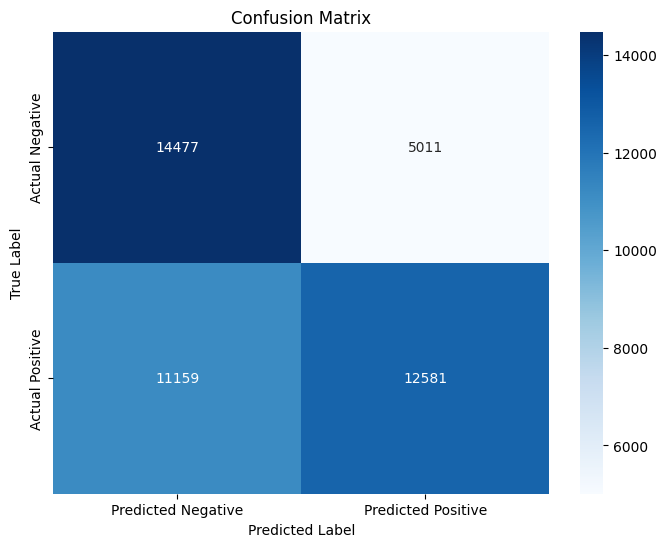

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)

# Визуализируем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Вычисляем метрики для тестовой выборки
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

# Выводим результаты
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.6234847783843805
F1 Score: 0.6035272337523141
Precision: 0.7155730129390019
Recall: 0.5218197135636057


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.6648342124520842
PR-AUC: 0.6995058240378906


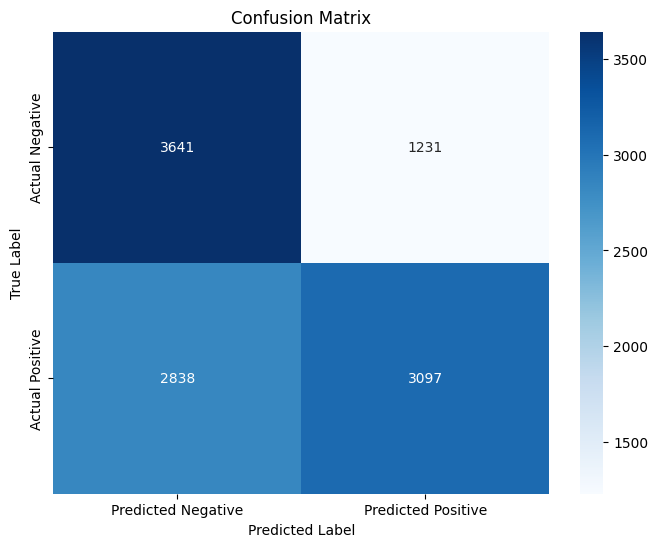

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

# Визуализируем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Нам удалось немного лучшить результат модели, так как увелилися ее recall